In [1]:
# Basics
import numpy as np
import pandas as pd

# Dataviz
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import visualkeras

# ML/Deep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report
import keras

/home/constantjunior/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Import et lecture des données

In [2]:
df = pd.read_csv("bcw_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.  Analyse et visualisation

### Analyse des données

In [4]:
# Vérification des valeurs nulle
df.isnull().mean()*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [5]:
## Visualisation des informations concernant la dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Vérification des nombres des valeurs de la target  
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

diagnosis    2
dtype: int64

In [7]:
# Description statistique de la dataset
df.select_dtypes('float64').describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Visualisation des données

<AxesSubplot:>

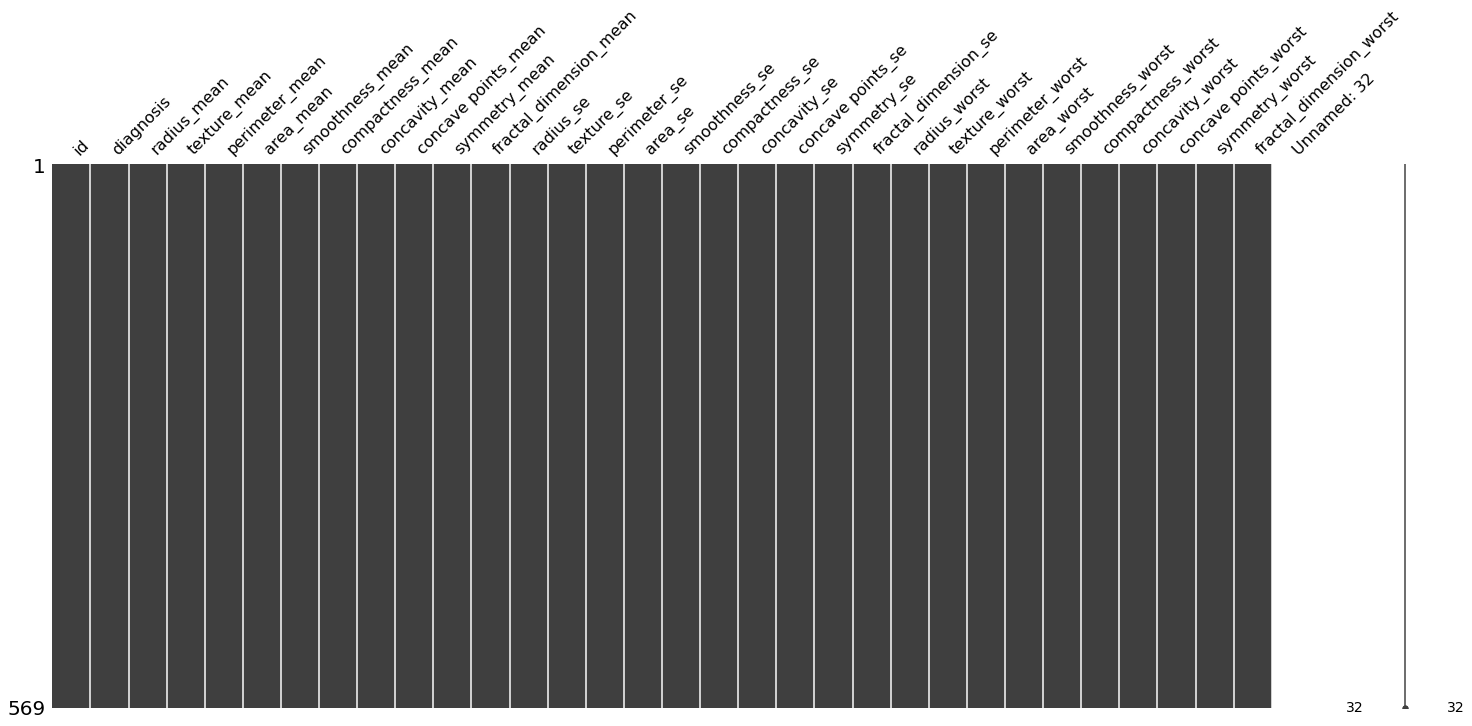

In [8]:
msno.matrix(df)

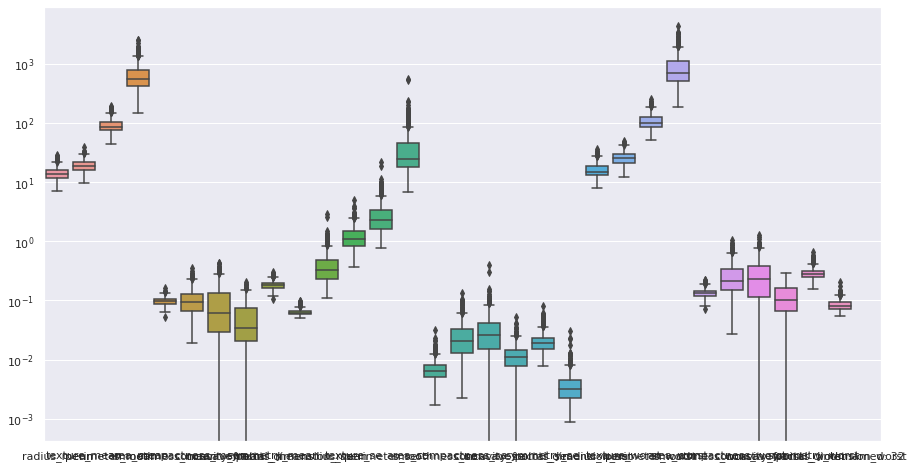

In [9]:
# Boxplot pour visualiser des données si probable aberrant
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df.select_dtypes('float64')).set_yscale("log")

On remaque un nombre d'outlier constant dans toutes les colonnes de mon dataset, ce boxplot ne nous permet pas de définir une limite sur les données et ça  demande une recherche métier pour savoir comment traiter ce dataset.

Après étude de la documentation et des papiers scientifique fournie avec le dataset on peut en conclure que toutes les données sont réel et qu'il n'y a donc pas de données aberrantes dans ce dataset.

https://pages.cs.wisc.edu/~olvi/uwmp/cancer.html

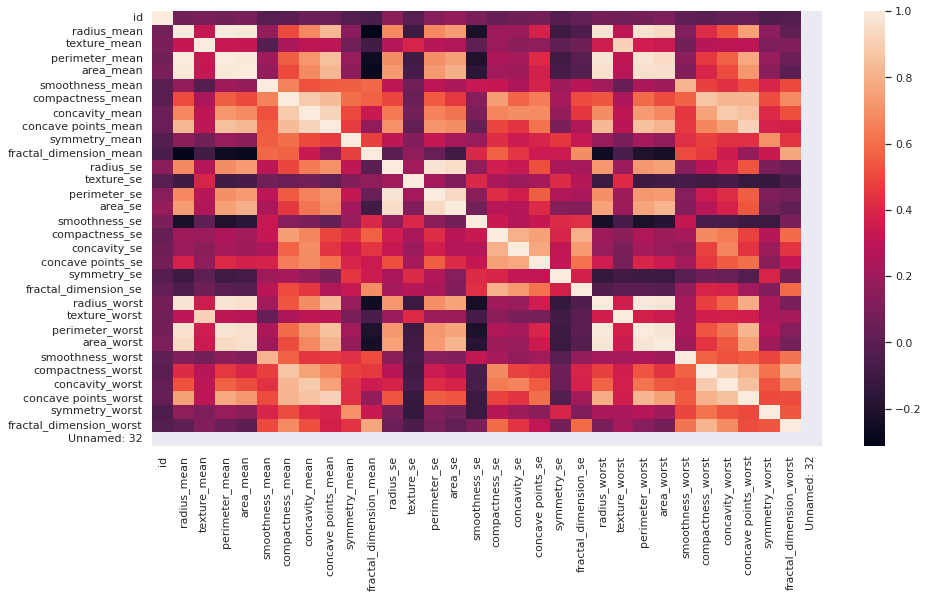

In [10]:
# La visualisation de la correlation entre les features
sns.heatmap(df.corr());

On remarque des points de corrélation dans les différentes valeur relié à "texture" et "area".
On peut aussi observer un haut taux de corrélation dans la majorité du dataset.

<AxesSubplot:>

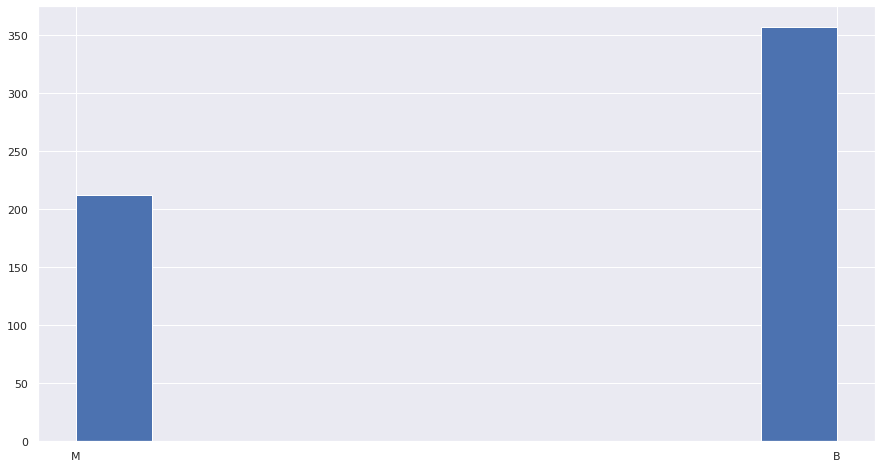

In [11]:
# Visualisation de la répartition d'Échantillon par label
df.diagnosis.hist()

## Transformation des données

In [12]:
# Suppression des colonne id et Umnamed
df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
# Encodage des valeurs de la colonne de label "diagnosis"
encoder = preprocessing.LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])

In [15]:
""" Mise à l'échelle des Features est une étape essentielle dans la modélisation des algorithmes avec les ensembles de données.
Nous avons normalisé les features excepter la colonne diagnosis
"""
X = np.array(df.loc[:, ~df.columns.isin(["diagnosis"])])
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(569, 30)

In [16]:
"""Choix de la colonne diagnosis en y"""
y = np.array(df["diagnosis"])
y.shape

(569,)

### La division de la data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

# Modèle

## Définition du modèle 1

In [18]:
"""Le modèle est composé de 2 couches dont une couche d'entrer, une couche de sortie et deux couches cachées
La couche d'entrée comporte 30 neurones comme le nombre des features a l'entrée, cela permet de donner à chaque neurone un feature,
avec une fonction d'activation relu.
La couche de sortie a un seul neurone, et une fonction d'activation sigmoid."""

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


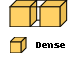

In [19]:
# Visualisation du model sous forme de graphe en utilisant VisualKeras
visualkeras.layered_view(model, legend=True,)

### Entrainement du modèle 1

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

In [21]:
# Performances du modele
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.998, Test: 0.979


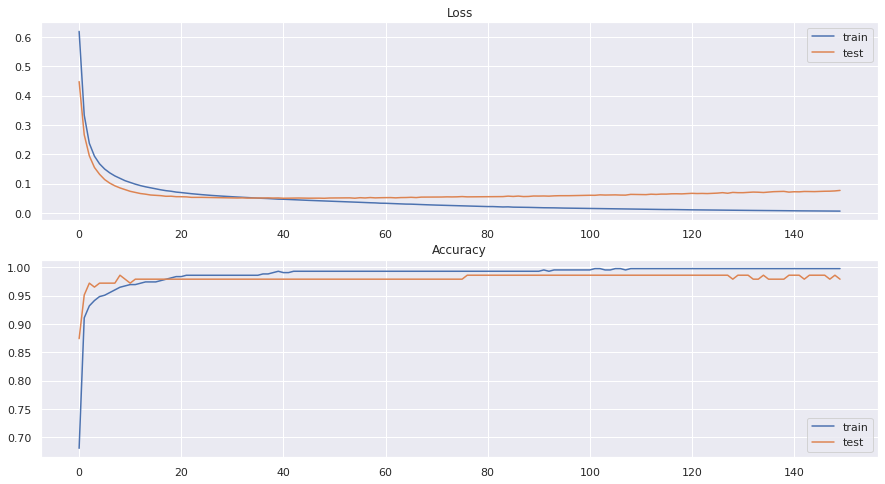

In [22]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [23]:
y_pred = model.predict(X_test, verbose=1)
y_pred_bool = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_bool))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.75        85
           1       0.00      0.00      0.00        58

    accuracy                           0.59       143
   macro avg       0.30      0.50      0.37       143
weighted avg       0.35      0.59      0.44       143



/home/constantjunior/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/constantjunior/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/constantjunior/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


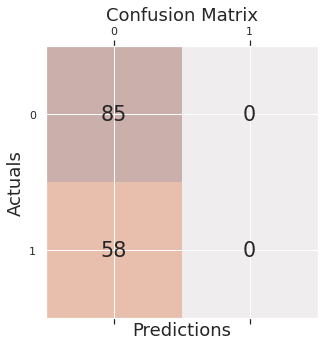

The confusion matrix shows us the number of
True positives : 85
True negatives : 0
False positives: 58
False negatives: 0


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_bool)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])

## Construction du modèle 2 

In [39]:
# Le deuxieme model est construt en ajoutant des couches de dropout permettant d'eviter l'overfiting

model2 = Sequential()
model2.add(Dense(30, activation='relu', input_dim=30))
model2.add(Dropout(0.2))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.2)
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 25)                775       
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,731
Trainable params: 1,731
Non-trainable params: 0
_________________________________________________________________


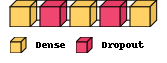

In [26]:
# Visualisation du model sous forme de graphe en utilisant VisualKeras
visualkeras.layered_view(model2, legend=True,)

### Entrainement du modèle 2

In [34]:
history_2 = model2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size= 40, validation_split = 0.1, epochs= 150)

Epoch 1/150
10/10 [==============================] - 0s 10ms/step - loss: 0.5131 - accuracy: 0.7624 - val_loss: 0.5398 - val_accuracy: 0.7442
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7650 - val_loss: 0.5396 - val_accuracy: 0.7442
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.7650 - val_loss: 0.5396 - val_accuracy: 0.7442
Epoch 4/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5255 - accuracy: 0.7520 - val_loss: 0.5395 - val_accuracy: 0.7442
Epoch 5/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5088 - accuracy: 0.7650 - val_loss: 0.5396 - val_accuracy: 0.7442
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5154 - accuracy: 0.7598 - val_loss: 0.5397 - val_accuracy: 0.7442
Epoch 7/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4990 - accuracy: 0.7728 - val_loss: 0.5399 - val_accuracy: 0.7442
Epoch 8/150


Epoch 59/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4849 - accuracy: 0.7833 - val_loss: 0.5094 - val_accuracy: 0.7674
Epoch 60/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7781 - val_loss: 0.5095 - val_accuracy: 0.7674
Epoch 61/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7702 - val_loss: 0.5094 - val_accuracy: 0.7674
Epoch 62/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7833 - val_loss: 0.5093 - val_accuracy: 0.7674
Epoch 63/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.7911 - val_loss: 0.5099 - val_accuracy: 0.7674
Epoch 64/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4806 - accuracy: 0.7859 - val_loss: 0.5097 - val_accuracy: 0.7674
Epoch 65/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4843 - accuracy: 0.7833 - val_loss: 0.5098 - val_accuracy: 0.7674
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.4773 - accuracy: 0.7885 - val_loss: 0.4804 - val_accuracy: 0.7907
Epoch 117/150
10/10 [==============================] - 0s 7ms/step - loss: 0.4643 - accuracy: 0.7990 - val_loss: 0.4774 - val_accuracy: 0.7907
Epoch 118/150
10/10 [==============================] - 0s 7ms/step - loss: 0.4768 - accuracy: 0.7885 - val_loss: 0.4775 - val_accuracy: 0.7907
Epoch 119/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4735 - accuracy: 0.7937 - val_loss: 0.4774 - val_accuracy: 0.7907
Epoch 120/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4915 - accuracy: 0.7781 - val_loss: 0.4798 - val_accuracy: 0.7907
Epoch 121/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4853 - accuracy: 0.7833 - val_loss: 0.4789 - val_accuracy: 0.7907
Epoch 122/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.7781 - val_loss: 0.4774 - val_accuracy: 0.7907
Epoch 123/150

In [35]:
# Performances du modele 2
_, train_acc_2 = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc_2 = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_2, test_acc_2))

Train: 0.808, Test: 0.734


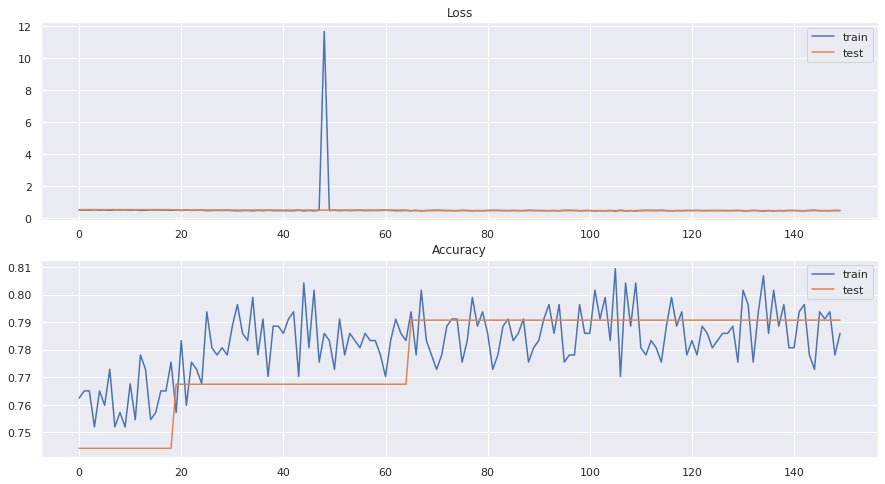

In [36]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_2.history['accuracy'], label='train')
pyplot.plot(history_2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Performance du modèle

In [37]:
y_pred_2 = model2.predict(X_test, verbose=1)
prediction = []
for i in range (len(y_pred_2)):
    if y_pred_2[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

print(classification_report(y_test, prediction))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        85
           1       1.00      0.34      0.51        58

    accuracy                           0.73       143
   macro avg       0.85      0.67      0.67       143
weighted avg       0.82      0.73      0.69       143



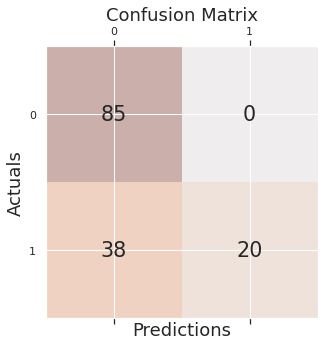

The confusion matrix shows us the number of
True positives : 85
True negatives : 0
False positives: 38
False negatives: 20


In [38]:
conf_matrix_2 = confusion_matrix(y_test, list(prediction))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_2.shape[0]):
    for j in range(conf_matrix_2.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_2[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix_2[0][0])
print('True negatives :', conf_matrix_2[0][1])
print('False positives:', conf_matrix_2[1][0])
print('False negatives:', conf_matrix_2[1][1])